<h1>Algoritmo BFS</h1><br>
<b><i>El algoritmo de breadth first search permite iterar grafos de manera iremos en orden de profundidad. Es decir, empezaremos por los nodos adyacentes a la raíz 'S' del grafo y luego analizaremos los nodos adyacentes a ellos.</i></b><br><br>
Como explicamos en el <a href="Trabajo_Parcial_Complejidad.ipynb">informe principal</a>, este algoritmo nos permitirà hallar el camino más corto entre dos puntos en el tablero (Más útil cuando hay barreras). <br> En este caso demostraremos la utilidad de BFS en nuestro juego, hallando el camino más corto entre 2 puntos dado un laberinto resolviendo un problema que se puede encontrar en <a href="https://cses.fi/problemset/task/1193">cses.fi</a>.


<h2>Definición de recursos e input</h2><br>
Para usar BFS usaremos una queue y también nos servirá tener una lista con las direcciones a las que podremos movernos <br>
El input de datos constará un numero de filas y columnas del tablero y de una matriz de <code>#</code> y <code>.</code> tal como la que se muestra en el output.

Donde <code>5</code> y <code>8</code> son el numero de filas y columnas y, <code>A</code> y <code>B</code> son el punto de partida y final

<br>
También definiremos una matriz que nos servirá de registro de movimientos(<code>move_reg</code>), en donde sabremos si los nodos ya fueron visitados o son parte del camino más corto actual. Donde se representará cada movimiento como numeros entre $1$ y $4$.

In [6]:
from collections import deque
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

n, m = [int(x) for x in input().split()] 

board = [[] for x in range(n)] 

start, end = (-1, -1), (-1, -1)
for i in range(n):
    board[i] = list(input())
    for j in range(m):
        if board[i][j] == 'A':
            start = (i, j)
        if board[i][j] == 'B':
            end = (i, j)
move_reg = [[-1 for y in range(m)] for x in range(n)] 

move_reg[start[0]][start[1]] = -2
q = deque([start])


5 8
########
#.A#...#
#.##.#B#
#......#
########


<h2>Funciones adicionales</h2>
<br><code>valid(int,int)</code> se encarga de validar que la posición brindada no esté fuera de los limites, ni sea pared y no haya sido visitada aún.
<br><br>
Y <code>reconstruct_path()</code> se encargará ayudarnos a visualizar el camino encontrado mostrando un <code>+</code> en el camino más corto. Es importante recalcar que para esto se dependerá del <code>registro de movimientos</code> que es modificado en la función <code>bfs()</code> definida más abajo, y de acuerdo a los movimientos que se encuentre, se dibujará el <code>+</code> y se moverá en dirección opuesta a la que indica el camino más corto al punto B. <br><br>En el caso de este ejemplo, solo tratamos de demostrar la eficiencia de este algoritmo para llegar al camino más corto. Sin embargo, en otros casos se realizarán acciones más complejas que señalar el camino. 

In [8]:
def valid(row, col):
    return 0 <= row and row < n and 0 <= col and col < m and board[row][col] != '#' and move_reg[row][col] == -1

def reconstruct_path():
    r, c  = end
    while move_reg[r][c] >= 0:
        i = move_reg[r][c] 
        r -= dx[i]
        c -= dy[i]
        board[r][c] =  'A' if board[r][c] == 'A' else '+'


<h2>El algoritmo principal</h2>
<p>
<code>BFS</code> iterará por los nodos hasta encontrar el camino más corto. Almacenaremos primer nodo <code>A</code> en la primera posición de la queue y recorreremos todos sus 'hijos' que en este caso serían las posiciones disponibles adyacentes y los añadiremos a la cola para recorrerlos más adelante.
</p>
Cuándo el nodo actual sea el nodo <code>B</code> sabremos que hemos llegado al final de la forma más rápida y si la queue llegara a estar completamente vacía, nos daríamos cuenta de que no hay un camino disponible de <code>A</code> a <code>B</code>

In [9]:
def bfs():
    flag = False
    while len(q):
        r, c = q.popleft()
        if (r, c) == end:
            reconstruct_path()
            flag = True
            break
        for i in range(4):
            nr, nc = r + dx[i], c + dy[i]
            if valid(nr, nc):
                move_reg[nr][nc] = i
                q.append((nr, nc))

    if not flag: print("No suitable path")
    else:
        for i in board: print(i)

In [2]:
bfs()

5 8
########
#.A#...#
#.##.#B#
#......#
########
['#', '#', '#', '#', '#', '#', '#', '#']
['#', '+', 'A', '#', '.', '.', '.', '#']
['#', '+', '#', '#', '.', '#', 'B', '#']
['#', '+', '+', '+', '+', '+', '+', '#']
['#', '#', '#', '#', '#', '#', '#', '#']


<h2>Conclusiones</h2><br>
<p>    
<code>El espacio de busqueda de BFS</code>en este caso sería el tamaño del tablero. En el caso del ejemplo vendría a ser $40$, es decir $O(m×n)$ debido a que la complejidad de BFS es $O(V+E)$ (Argumentado en el <a href="Trabajo_Parcial_Complejidad.ipynb">informe principal</a>) .</p>
<p>
    Sin embargo, como queremos buscar el camino más corto entre <code>A</code> y <code>B</code>, es muy probable que encontremos dicho camino antes de haber recorrido todos los nodos y el algoritmo termine, haciéndolo mucho más eficiente.</p>

<p>
    En el Quoridor que vamos a desarrollar, se podrá ingresar la cantidad de <code>filas</code> y <code>columnas</code> que tendrá el tablero, por lo que será necesario buscar la forma de optimizar <code>BFS</code>. Por ejemplo llevar control de soluciones optimas previas. Quizás si un nodo ya fue visitado y el camino actual ha recorrido menos distancia y el nodo en cuestión no aportaría nada, no habría razón de visitarlo y ampliar nuestro <code>espacio de busqueda</code></p>



<h2>Como nos acercamos al problema con BFS</h2>

<p>Debido a las restricciones que tiene el movimiento en Quoridor, el proceso de acceso a los <code>nodos adyacentes</code>tiene algunos cambios.</p>
<p>Principalmente, ahora lo que necesitamos es la siguiente <b>posición</b> a la que se debe dirigir el jugador. Entonces lo que hace la funcion <code>get_next_move()</code> es, una vez obtenido el camino más corto y haberlo almacenado en el registro de movimientos al igual que en el primer ejemplo, usar la funcion <code>reconstruct_path()</code> para recorrerlo en reverso y llevar control de la última posición accedida hasta antes de llegar a la posición inicial y así obtener el <b>siguiente movimiento</b> que deberá realizar el jugador.</p>
<p>La mayoría de lineas adicionales se deben a la validación de las excepciones de movimiento que se explican en el <a href="Trabajo_Parcial_Complejidad.ipynb"> infomre principal</a></p>

<p>Con respecto a los parametros de la función, <code>board</code> hace referencia a la matriz del juego donde se almacena todo, <code>side</code> es el lado en el que se encuentra el jugador y asumir que desea llegar al lado opuesto y <code>startpoint</code> es la posición del jugador, para que la función no pierda el tiempo buscando dónde empezar el <code>BFS</code></p>

In [50]:
from collections import deque
def get_next_move(board, side, startpoint): ## side == True = UP else DOWN 
    dx = [1, -1, 0, 0] ## R L D U
    dy = [0, 0, 1, -1]
               #       (UR UL DR DL)
    diagonals = [(-1,1), (-1,-1), (1,1), (1,-1)]
    n, m = len(board), len(board[0])
    if side:
        original = board[-1]
        board[-1] = ['W' if board[-1][x] == ' ' or board[-1][x] == '#' else board[-1][x] for x in range(m)]
    else: 
        original = board[0]
        board[0] = ['W' if board[0][x] == ' ' or board[0][x] == '#' else board[0][x] for x in range(m)]

    q = deque([startpoint])
    move_reg = [[-1 for y in range(m)] for x in range(n)] 
    

    def valid(row, col):
        return 0 <= row and row < n and 0 <= col and col < m and move_reg[row][col] == -1 and board[row][col] != '#'

    def reconstruct_path(r, c):
        last = [r,c]
        while move_reg[r][c] >= 0:
            i = move_reg[r][c] 
            if i < 4:
                r -= dx[i]
                c -= dy[i]
            elif i < 8:
                r -= 2*dx[i%4]
                c -= 2*dy[i%4]
            else: 
                i %= 4
                r -= diagonals[i][0]
                c -= diagonals[i][1]
            if (r,c) == startpoint:
                return last
            else: last = [r-1,c-1]
        return -1, -1
            

    while len(q):
        r, c = q.popleft()
        if board[r][c] == 'W':
            if side: board[-1] = original
            else: board[0] = original
            return reconstruct_path(r,c)
            break
        for i in range(4):
            nr, nc = r + dx[i], c + dy[i]
            if valid(nr, nc):
                if board[nr][nc] == 'X' or board[nr][nc] == 'O':    
                    if(valid(nr+dx[i],nc+dy[i])):
                        q.append((nr+dx[i],nc+dy[i]))
                        move_reg[nr+dx[i]][nc+dy[i]] = i+4
                    else:
                        #      (UR UL DR DL)
                        #  (-1,1), (-1,-1), (1,1), (1,-1)
                        if dx[i] == 0:
                            if valid(r+dy[i],c+1):      
                                q.append((r+dy[i],c+1))  
                                move_reg[r+dy[i]][c+1] = 8 + (0 if dy[i] == -1 else 2)

                            if valid(r+dy[i],c-1):      
                                q.append((r+dy[i],c-1))    
                                move_reg[r+dy[i]][c-1] = 8 + (1 if dy[i] == -1 else 3)

                        if dy[i] == 0:
                            if valid(r+1,c+dx[i]): 
                                q.append((r+1,c+dx[i]))
                                move_reg[r+1][c+dx[i]] = 8 + (3 if dx[i] == -1 else 2)

                            if valid(r-1,c+dx[i]): 
                                q.append((r-1,c+dx[i]))
                                move_reg[r-1][c+dx[i]] = 8 + (1 if dx[i] == -1 else 0)

                else:
                    move_reg[nr][nc] = i
                    q.append((nr, nc))
                    

<h2>Medicion de tiempos</h2>

<h4>Matriz Aleatoria</h4>


In [68]:
import time
import numpy as np
from random import getrandbits
from matplotlib import pyplot as plt

def get_random_matrix(n):
    np.random.seed(np.random.randint(low=1,high=42))
    mat =np.full((n,n), ' ')
    mat[:,[0,-1]] = mat[[0,-1]] = '#'
    pos1, pos2 = [0,0],[0,0]
    while np.array_equal(pos1, pos2):
        pos1, pos2 = np.random.randint(low = 1, high = n-1, size=2),np.random.randint(low = 1, high = n-1, size=2) 
    mat[pos1[0],pos1[1]] = 'O';mat[pos2[0],pos2[1]] = 'X';
    return mat, (pos1[0], pos1[1]), (pos2[0], pos2[1])

<h4>Graficar tiempos</h4>
<p>Debido a que las posiciones son aleatorias, el tiempo que tarda <code>BFS</code> en hallar el camino más corto puede variar. <br>Tomar en cuenta que se está considerando los saltos diagonales y dobles cuando hay 'colisión' entre fichas, en beneficio del camino más corto.</p>

10 values took 0.0s
366 values took 0.816s
722 values took 3.331s
1079 values took 0.045s
1435 values took 10.301s
1792 values took 10.742s
2148 values took 2.115s
2505 values took 39.187s
2861 values took 35.455s
3217 values took 9.695s
3574 values took 18.788s
3930 values took 99.075s
4287 values took 59.145s
4643 values took 114.263s
5000 values took 5.362s
[[0, 3], [354, 206], [144, 390], [1065, 950], [930, 1104], [820, 1342], [1815, 1607], [1736, 1295], [1415, 1283], [2488, 709], [2542, 1608], [1065, 1993], [1983, 931], [2670, 2191], [594, 4838]]


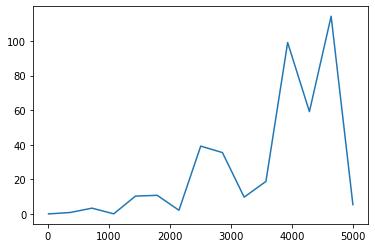

In [71]:
tests = np.linspace(10,5000,15,dtype=np.int32)
results = []
time_measured = []
for n in tests:
    print(n, "values took", end = " ")
    random_mat, posO, posX= get_random_matrix(n)    
    side = bool(getrandbits(1))
    start = time.time()
    results.append(get_next_move(random_mat,side, posX if side else posO))
    end = time.time()
    time_measured.append(end-start)
    print(f"{np.round(end-start, decimals=3)}s")
print(results)
plt.plot(tests, time_measured)
plt.show()